<center>
    <h2 align='center'> Đồ Án KHMT </h2>
<h2>    PHÂN TÍCH & XÂY DỰNG MÔ HÌNH Dự đoán khách hàng rời bỏ.
 </h2>
</center>

1. Mã sinh viên    : 2121050883

2. Họ tên sinh viên: Vũ Văn An

3. Lớp             : DCCTCT66-07B


In [1]:
# Thư viện xử lý dữ liệu và tính toán khoa học
import numpy as np  # Hỗ trợ thao tác với mảng số học, ma trận và các phép toán đại số tuyến tính
import pandas as pd  # Hỗ trợ thao tác và phân tích dữ liệu dạng bảng (DataFrame)

# Thư viện trực quan hóa dữ liệu
import matplotlib.pyplot as plt  # Vẽ biểu đồ 2D như biểu đồ cột, đường, histogram,...
import plotly.express as px  # Vẽ biểu đồ tương tác hiện đại, hỗ trợ trực quan hóa khám phá dữ liệu
import seaborn as sns  # Trực quan hóa thống kê, hỗ trợ biểu đồ phân bố, heatmap, boxplot,...

# Thư viện tiền xử lý dữ liệu
from sklearn.impute import SimpleImputer  # Xử lý dữ liệu thiếu (impute giá trị thiếu bằng trung bình, trung vị,...)
from sklearn.preprocessing import LabelEncoder, StandardScaler  
# LabelEncoder: Mã hóa biến phân loại dạng text sang số
# StandardScaler: Chuẩn hóa dữ liệu theo phân phối chuẩn (mean = 0, std = 1)

# Các mô hình học máy giám sát (phân loại)
from sklearn.linear_model import LogisticRegression  # Hồi quy logistic
from sklearn.svm import SVC  # Máy vector hỗ trợ (Support Vector Machine)
from sklearn.tree import DecisionTreeClassifier  # Cây quyết định
from sklearn.naive_bayes import GaussianNB  # Bộ phân loại Naive Bayes với phân phối chuẩn
from sklearn.neighbors import KNeighborsClassifier  # Phân loại theo thuật toán K-Nearest Neighbors
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier  
# RandomForestClassifier: Rừng cây ngẫu nhiên
# GradientBoostingClassifier: Tăng cường độ dốc (Gradient Boosting)
# AdaBoostClassifier: Thuật toán Boosting cải tiến
# VotingClassifier: Kết hợp nhiều mô hình phân loại để cải thiện hiệu suất

from xgboost import XGBClassifier  # Mô hình XGBoost, một thuật toán boosting hiệu suất cao

# Thư viện chia tập dữ liệu và đánh giá mô hình
from sklearn.model_selection import KFold, cross_val_score, train_test_split  
# KFold: Chia dữ liệu thành K phần để đánh giá chéo
# cross_val_score: Tính điểm đánh giá mô hình bằng Cross Validation
# train_test_split: Chia dữ liệu thành tập huấn luyện và tập kiểm tra

# Các chỉ số đánh giá mô hình
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score  
# confusion_matrix: Ma trận nhầm lẫn
# accuracy_score: Độ chính xác
# precision_score: Độ chính xác theo lớp dương (Precision)
# recall_score: Khả năng phát hiện đúng lớp dương (Recall)

# Tắt các cảnh báo không cần thiết trong quá trình thực thi
import warnings
warnings.filterwarnings('ignore')  # Bỏ qua các cảnh báo để giao diện gọn gàng hơn


In [2]:
#đọc dữ liệu
data=pd.read_csv('Data/Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
#Hiện thị thông tin dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Mô tả các cột**
1. customerID: Mã khách hàng(kiểu object).
2. gender: Giới tính của khách hàng (Nam/Nữ) (kiểu object).
3. SeniorCitizen: Biến nhị phân cho biết khách hàng có phải là người cao tuổi hay không (0: Không, 1: Có) (kiểu int64).
4. Partner: Khách hàng có đang sống cùng bạn đời hay không (Yes/No) (kiểu object).
5. Dependents: Khách hàng có người phụ thuộc hay không (Yes/No) (kiểu object).
6. tenure: Số tháng khách hàng đã gắn bó với công ty (kiểu int64).
7. PhoneService: Khách hàng có sử dụng dịch vụ điện thoại không (Yes/No) (kiểu object).
8. MultipleLines: Khách hàng có nhiều đường dây điện thoại không (Yes/No/No phone service) (kiểu object).
9. InternetService: Loại dịch vụ internet khách hàng sử dụng (DSL/Fiber optic/No) (kiểu object).
10. OnlineSecurity: Khách hàng có đăng ký dịch vụ bảo mật trực tuyến không (Yes/No/No internet service) (kiểu object).
11. OnlineBackup: Khách hàng có sử dụng dịch vụ sao lưu trực tuyến không (Yes/No/No internet service) (kiểu object).
12. DeviceProtection: Khách hàng có đăng ký bảo vệ thiết bị không (Yes/No/No internet service) (kiểu object).
13. TechSupport: Khách hàng có sử dụng hỗ trợ kỹ thuật không (Yes/No/No internet service) (kiểu object).
14. StreamingTV: Khách hàng có đăng ký dịch vụ truyền hình trực tuyến không (Yes/No/No internet service) (kiểu object).
15. StreamingMovies: Khách hàng có đăng ký dịch vụ xem phim trực tuyến không (Yes/No/No internet service) (kiểu object).
16. Contract: Loại hợp đồng khách hàng đang sử dụng (Month-to-month/One year/Two year) (kiểu object).
17. PaperlessBilling: Khách hàng có sử dụng hóa đơn điện tử không (Yes/No) (kiểu object).
18. PaymentMethod: Phương thức thanh toán (Electronic check/Mailed check/Bank transfer/Credit card) (kiểu object).
19. MonthlyCharges: Cước phí hàng tháng mà khách hàng phải trả (kiểu float64).
20. TotalCharges: Tổng chi phí khách hàng đã trả (đang ở kiểu object, có thể cần chuyển sang float64).
21. Churn: Biến nhị phân cho biết khách hàng có rời bỏ công ty hay không (Yes/No) (kiểu object).


### Nhận Xét
Tập dữ liệu gồm 7.043 dòng và 21 cột, tương ứng với 7.043 khách hàng và 21 thuộc tính mô tả hành vi, dịch vụ, chi phí và thông tin cá nhân của khách hàng.

Có 18 cột thuộc kiểu object , 2 cột kiểu số nguyên (int64) là SeniorCitizen và tenure, và 1 cột kiểu số thực (float64) là MonthlyCharges.

Cột TotalCharges hiện đang ở dạng object dù bản chất là một đại lượng số liên tục, cần xử lý và ép kiểu về float để sử dụng trong mô hình phân tích và dự đoán.

Không có cột nào bị thiếu dữ liệu hoàn toàn (tất cả đều có 7043 giá trị không null). Tuy nhiên, sau khi chuyển đổi TotalCharges sang số, một số dòng có thể xuất hiện NaN do chứa giá trị rỗng hoặc không hợp lệ – cần xử lý (ví dụ: gán bằng 0 hoặc loại bỏ).

Cần xử lý 1 số cột về dạng số để có thể huấn luyện mô hình

Biến mục tiêu Churn đang ở dạng chuỗi "Yes" / "No" cần được chuyển đổi sang dạng nhị phân 1 / 0 để phục vụ cho bài toán phân loại nhị phân (dự đoán rời bỏ).

In [4]:
#hiển thị 5 dòng dữ liệu đầu tiên
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# hiện thị 5 bản ghi cuối
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
#lấy ngẫu nhiên 10 bản ghi
data.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6000,9503-XJUME,Male,0,No,Yes,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.65,928.4,No
3340,6015-VVHHE,Female,1,No,No,5,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),83.15,446.05,Yes
706,7596-ZYWBB,Female,0,No,No,65,Yes,No,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Mailed check,59.60,3739.8,No
2844,2265-CYWIV,Female,1,Yes,No,4,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.60,347.65,Yes
2260,6204-IEUXJ,Female,0,No,No,3,Yes,No,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),80.10,217.55,Yes
2529,0022-TCJCI,Male,1,No,No,45,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Credit card (automatic),62.70,2791.5,Yes
5139,5549-ZGHFB,Male,0,Yes,Yes,50,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,24.95,1261.45,No
1133,3156-QLHBO,Male,0,No,Yes,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.25,48.35,No
4086,2235-EZAIK,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),79.20,5401.9,No
3249,4324-BZCKL,Female,0,Yes,Yes,10,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,55.55,551.3,No


## Bước 2: Chuẩn bị dữ liệu (Data Preparation)
---
Một số vấn đề cơ bản cần giải quyết trong giai đoạn này bao gồm:
* Khám phá dữ liệu
* Làm sạch dữ liệu (xử lý giá trị thiếu, giá trị ngoại lai)
* Tích hợp dữ liệu
* Biến đổi, rời rạc hóa và chuẩn hóa dữ liệu
* Cân bằng dữ liệu.
* Rút gọn thuộc tính.

### 2.1) Quan sát và khám phá tập dữ liệu
---
Thực hiện quan sát các đặc trưng thống kê, các biểu đồ liên quan đến tập dữ liệu để hiểu dữ liệu.

In [7]:
#khám phá tập dữ liệu 
#1. Quan sát Các thuộc tính số
data.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Nhận xét:
- Không có giá trị thiếu ở các cột này.

- SeniorCitizen: Chỉ khoảng 16% khách hàng là người cao tuổi, còn lại phần lớn là người trẻ. 

- Tenure: Thời gian gắn bó trung bình là 32 tháng; có cả khách hàng mới và khách hàng lâu năm (tối đa 72 tháng).

- MonthlyCharges: Mức phí trung bình là 64.76$, dao động khá lớn từ 18.25$ đến 118.75$, phản ánh sự đa dạng về gói dịch vụ.

In [8]:
#2. Quan sát Các thuộc tính object
data.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


### Nhận xét 
Biến TotalCharges dù là đại lượng số  → cần chuyển đổi 

Biến Churn là biến mục tiêu, đang ở dạng chuỗi "Yes"/"No" → cần chuyển thành nhị phân 1/0 để huấn luyện mô hình.



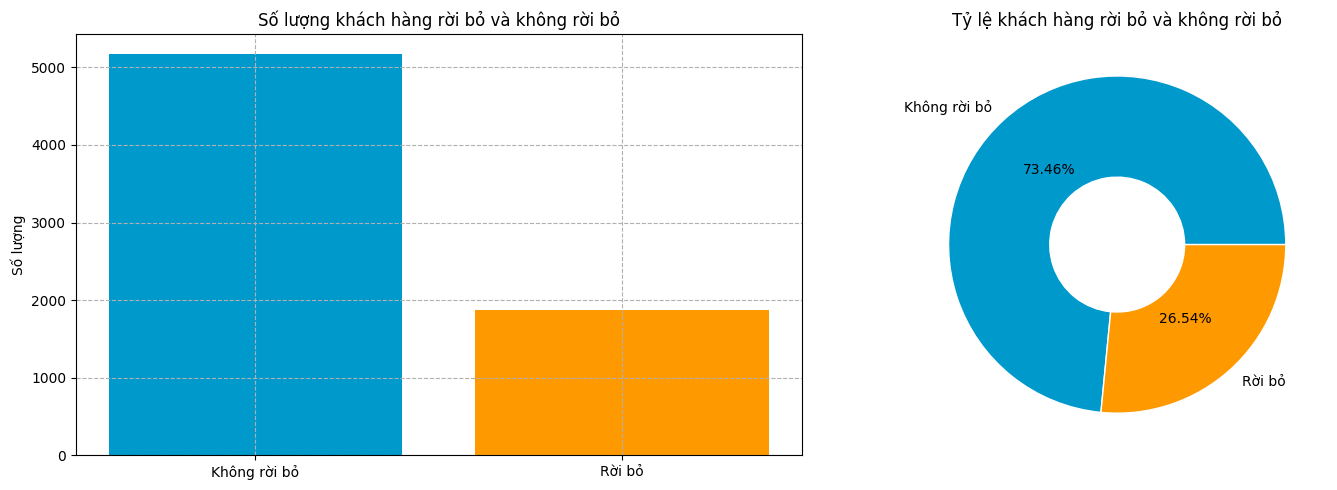

In [9]:
import matplotlib.pyplot as plt

# Đếm số lượng khách hàng theo nhãn 'Churn'
kq = data['Churn'].value_counts()
labels = ['Không rời bỏ', 'Rời bỏ']

plt.figure(figsize=(15,5))

# Biểu đồ cột
plt.subplot(1,2,1)
plt.bar(labels, kq.values, color=['#0099CC', '#FF9900'])
plt.title('Số lượng khách hàng rời bỏ và không rời bỏ')
plt.ylabel('Số lượng')
plt.grid(ls='--')

# Biểu đồ tròn
plt.subplot(1,2,2)
plt.pie(kq.values, labels=labels, colors=['#0099CC', '#FF9900'],
        autopct='%.2f%%', wedgeprops=dict(width=0.6, edgecolor='w'))
plt.title('Tỷ lệ khách hàng rời bỏ và không rời bỏ')

plt.tight_layout()
plt.show()


### Nhận xét 
Biến mục tiêu Churn cho thấy sự mất cân bằng rõ rệt: khoảng 26% khách hàng đã rời bỏ, trong khi 74% vẫn còn gắn bó với công ty.

### 2.2) Phát hiện và xử lý dữ liệu thiếu trong Dataset
---
Nếu dữ liệu có chứa các giá trị thiếu (null - missing) nó sẽ gây ra vấn đề lớn cho các model học máy. Do đó, quá trình chuẩn bị dữ liệu phải tìm ra các giá trị thiếu trong tập dữ liệu và xử lý chúng. 



In [10]:
#Kiểm tra dữ liệu thiếu trong Dataset
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Nhận xét:**

Tập dữ liệu ko có giá trị null

In [11]:
# Kiểm tra dữ liệu trùng lặp trong Dataset
duplicate_rows = data.duplicated().sum()
print(f"Số lượng bản ghi trùng lặp: {duplicate_rows}")

Số lượng bản ghi trùng lặp: 0


### 2.3) Mã hóa dữ liệu liệu Categorical (Encoding Categorical Data)

In [12]:
# 1. Loại bỏ cột customerID 
data = data.drop('customerID', axis=1)


In [13]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
#Liệt kê các giá trị của cthuộc tính
print('1. Thuộc tính gender:', data['gender'].unique())
print('2. Thuộc tính Partner:', data['Partner'].unique())
print('3. Thuộc tính Dependents:', data['Dependents'].unique())
print('4. Thuộc tính PhoneService:', data['PhoneService'].unique())
print('5. Thuộc tính MultipleLines:', data['MultipleLines'].unique())
print('6. Thuộc tính InternetService:', data['InternetService'].unique())
print('7. Thuộc tính OnlineSecurity:', data['OnlineSecurity'].unique())
print('8. Thuộc tính OnlineBackup:', data['OnlineBackup'].unique())
print('9. Thuộc tính DeviceProtection:', data['DeviceProtection'].unique())
print('10. Thuộc tính TechSupport:', data['TechSupport'].unique())
print('11. Thuộc tính StreamingTV:', data['StreamingTV'].unique())
print('12. Thuộc tính StreamingMovies:', data['StreamingMovies'].unique())
print('13. Thuộc tính Contract:', data['Contract'].unique())
print('14. Thuộc tính PaperlessBilling:', data['PaperlessBilling'].unique())
print('15. Thuộc tính PaymentMethod:', data['PaymentMethod'].unique())
print('16. Thuộc tính Churn:', data['Churn'].unique())


1. Thuộc tính gender: ['Female' 'Male']
2. Thuộc tính Partner: ['Yes' 'No']
3. Thuộc tính Dependents: ['No' 'Yes']
4. Thuộc tính PhoneService: ['No' 'Yes']
5. Thuộc tính MultipleLines: ['No phone service' 'No' 'Yes']
6. Thuộc tính InternetService: ['DSL' 'Fiber optic' 'No']
7. Thuộc tính OnlineSecurity: ['No' 'Yes' 'No internet service']
8. Thuộc tính OnlineBackup: ['Yes' 'No' 'No internet service']
9. Thuộc tính DeviceProtection: ['No' 'Yes' 'No internet service']
10. Thuộc tính TechSupport: ['No' 'Yes' 'No internet service']
11. Thuộc tính StreamingTV: ['No' 'Yes' 'No internet service']
12. Thuộc tính StreamingMovies: ['No' 'Yes' 'No internet service']
13. Thuộc tính Contract: ['Month-to-month' 'One year' 'Two year']
14. Thuộc tính PaperlessBilling: ['Yes' 'No']
15. Thuộc tính PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
16. Thuộc tính Churn: ['No' 'Yes']


In [15]:
# 1. Chuyển đổi giới tính: Male = 0, Female = 1
convert_gender = {'Male': 0, 'Female': 1}
data['gender'] = data['gender'].map(convert_gender)

# 2. Có bạn đời
convert_partner = {'No': 0, 'Yes': 1}
data['Partner'] = data['Partner'].map(convert_partner)

# 3. Có người phụ thuộc
convert_dependents = {'No': 0, 'Yes': 1}
data['Dependents'] = data['Dependents'].map(convert_dependents)

# 4. Có sử dụng điện thoại
convert_phone = {'No': 0, 'Yes': 1}
data['PhoneService'] = data['PhoneService'].map(convert_phone)

# 5. Dòng điện thoại phụ (# MultipleLines: gộp 'No phone service' và 'No' đều là 0, 'Yes' là 1)
data['MultipleLines'] = data['MultipleLines'].replace({'No phone service': 'No'})
data['MultipleLines'] = data['MultipleLines'].map({'No': 0, 'Yes': 1})

# 6. Loại dịch vụ Internet: DSL = 1, Fiber optic = 2, No = 0
convert_internet = {'No': 0, 'DSL': 1, 'Fiber optic': 2}
data['InternetService'] = data['InternetService'].map(convert_internet)

# 7-12. Các dịch vụ phụ thuộc vào Internet: gộp "No internet service" thành "No"
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in cols:
    data[col] = data[col].replace({'No internet service': 'No'})
    data[col] = data[col].map({'No': 0, 'Yes': 1})

# 13. Loại hợp đồng
convert_contract = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
data['Contract'] = data['Contract'].map(convert_contract)

# 14. Hóa đơn điện tử
convert_paperless = {'No': 0, 'Yes': 1}
data['PaperlessBilling'] = data['PaperlessBilling'].map(convert_paperless)

# 15. Phương thức thanh toán
convert_payment = {
    'Electronic check': 0,
    'Mailed check': 1,
    'Bank transfer (automatic)': 2,
    'Credit card (automatic)': 3
}
data['PaymentMethod'] = data['PaymentMethod'].map(convert_payment)

# 16. Biến mục tiêu: Rời bỏ khách hàng - Churn
convert_churn = {'No': 0, 'Yes': 1}
data['Churn'] = data['Churn'].map(convert_churn)


# Kiểm tra thông tin DataFrame sau khi mã hóa
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [16]:
# Ép kiểu TotalCharges sang float, chuyển lỗi thành NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Điền NaN bằng giá trị trung bình 
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())


In [17]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,0,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1


In [18]:
#2. Quan sát Các thuộc tính object
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


**Mô tả tập dữ liệu thu thập được phục vụ bài toán:**


- File dữ liệu chứa thông tin của 7.043 khách hàng viễn thông

- Mỗi dòng tương ứng với một khách hàng, bao gồm 21 thuộc tính mô tả đặc điểm cá nhân, dịch vụ đã dùng và biến mục tiêu:

- 1. customerID: Mã định danh khách hàng (object) 

- 2. gender: Giới tính của khách hàng (0: Male – 1: Female)

- 3.SeniorCitizen: Khách hàng có phải người cao tuổi không? (0: Không – 1: Có)

- 4.Partner: Có bạn đời không? (0: Không – 1: Có)

- 5.Dependents: Có người phụ thuộc không? (0: Không – 1: Có)

- 6.tenure: Số tháng sử dụng dịch vụ (số nguyên)

- 7.PhoneService: Có dùng điện thoại cố định không? (0: Không – 1: Có)

- 8.MultipleLines: Có nhiều đường dây điện thoại không? (0: Không – 1: Có)

- 9.InternetService: Loại kết nối Internet (0: Không | 1: DSL | 2: Fiber optic)

- 10.OnlineSecurity: Có bảo mật trực tuyến không? (0: Không – 1: Có)

- 11.OnlineBackup: Có sao lưu trực tuyến không? (0: Không – 1: Có)

- 12.DeviceProtection: Có bảo vệ thiết bị không? (0: Không – 1: Có)

- 13.TechSupport: Có hỗ trợ kỹ thuật không? (0: Không – 1: Có)

- 14.StreamingTV: Có xem TV trực tuyến không? (0: Không – 1: Có)

- 15.StreamingMovies: Có xem phim trực tuyến không? (0: Không – 1: Có)

- 16.Contract: Loại hợp đồng (0: Theo tháng | 1: Một năm | 2: Hai năm)

- 17.PaperlessBilling: Có dùng hóa đơn điện tử không? (0: Không – 1: Có)

- 18.PaymentMethod: Phương thức thanh toán (0: Electronic check | 1: Mailed check | 2: Bank transfer | 3: Credit card)

- 19.MonthlyCharges: Chi phí hàng tháng (float)

- 20 TotalCharges: Tổng chi phí đã trả (float)

- 21. Churn: Biến mục tiêu – Khách hàng rời bỏ dịch vụ (0: Không – 1: Có)

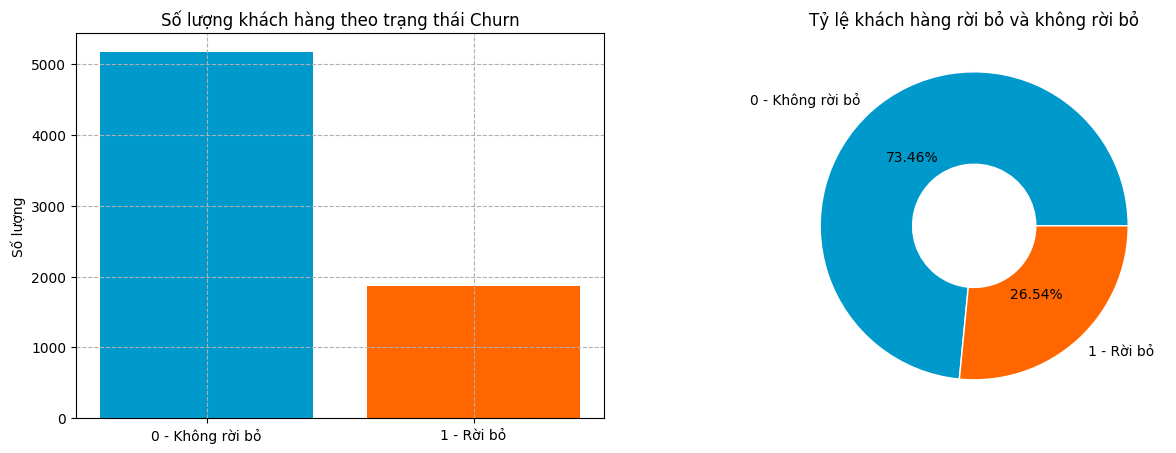

In [19]:
# Thống kê số lượng khách hàng theo trạng thái rời bỏ
churn_counts = data['Churn'].value_counts()
labels = ['0 - Không rời bỏ', '1 - Rời bỏ']

import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Biểu đồ cột
plt.subplot(1,2,1) 
plt.bar(labels, churn_counts.values, color=['#0099CC','#FF6600'])
plt.title('Số lượng khách hàng theo trạng thái Churn')
plt.ylabel('Số lượng')
plt.grid(ls='--')

# Biểu đồ tròn
plt.subplot(1,2,2)
plt.pie(churn_counts.values, labels=labels, colors=['#0099CC','#FF6600'],
        autopct='%.2f%%', wedgeprops=dict(width=0.6, edgecolor='w'))
plt.title('Tỷ lệ khách hàng rời bỏ và không rời bỏ')

plt.show()


In [20]:
#check lại dlsau khi xử lý
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Trực quan hóa dữ liệu 
- Nhóm 1: Thông tin cá nhân

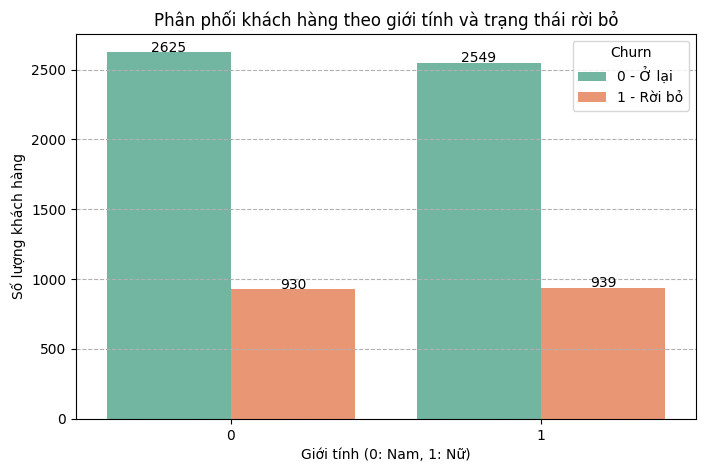

In [21]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='gender', hue='Churn', palette='Set2')
plt.title('Phân phối khách hàng theo giới tính và trạng thái rời bỏ')
plt.xlabel('Giới tính (0: Nam, 1: Nữ)')
plt.ylabel('Số lượng khách hàng')
plt.legend(title='Churn', labels=['0 - Ở lại', '1 - Rời bỏ'])
plt.grid(ls='--', axis='y')

# Thêm số lượng trên cột
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3,
            int(height), ha="center")

plt.show()


**Nhận xét:**

Tỷ lệ rời bỏ giữa nam và nữ khá tương đồng, không có sự chênh lệch lớn.

Do đó, giới tính không phải là yếu tố chính ảnh hưởng đến churn trong tập dữ liệu này.



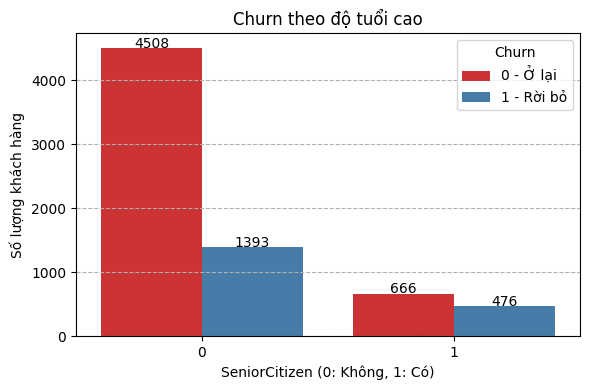

In [22]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=data, x='SeniorCitizen', hue='Churn', palette='Set1')
plt.title('Churn theo độ tuổi cao')
plt.xlabel('SeniorCitizen (0: Không, 1: Có)')
plt.ylabel('Số lượng khách hàng')
plt.legend(title='Churn', labels=['0 - Ở lại', '1 - Rời bỏ'])
plt.grid(ls='--', axis='y')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height() + 3, int(p.get_height()), ha='center')
plt.tight_layout()
plt.show()


 **Nhận xét:**
        Khách hàng cao tuổi có xu hướng rời bỏ cao hơn – có thể do họ gặp khó khăn trong sử dụng dịch vụ.

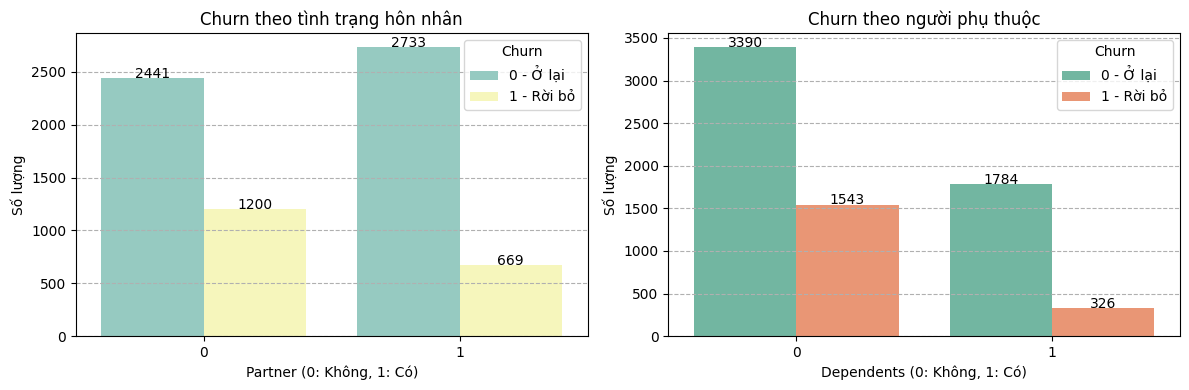

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=data, x='Partner', hue='Churn', ax=axes[0], palette='Set3')
axes[0].set_title('Churn theo tình trạng hôn nhân')
axes[0].set_xlabel('Partner (0: Không, 1: Có)')

sns.countplot(data=data, x='Dependents', hue='Churn', ax=axes[1], palette='Set2')
axes[1].set_title('Churn theo người phụ thuộc')
axes[1].set_xlabel('Dependents (0: Không, 1: Có)')

for ax in axes:
    ax.set_ylabel('Số lượng')
    ax.legend(title='Churn', labels=['0 - Ở lại', '1 - Rời bỏ'])
    ax.grid(ls='--', axis='y')
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height() + 3, int(p.get_height()), ha='center')

plt.tight_layout()
plt.show()


 **Nhận xét:**

Khách hàng có người thân hoặc người phụ thuộc ít rời bỏ hơn → ổn định hơn, cam kết lâu dài hơn.

### Nhóm 2: Thông tin dịch vụ

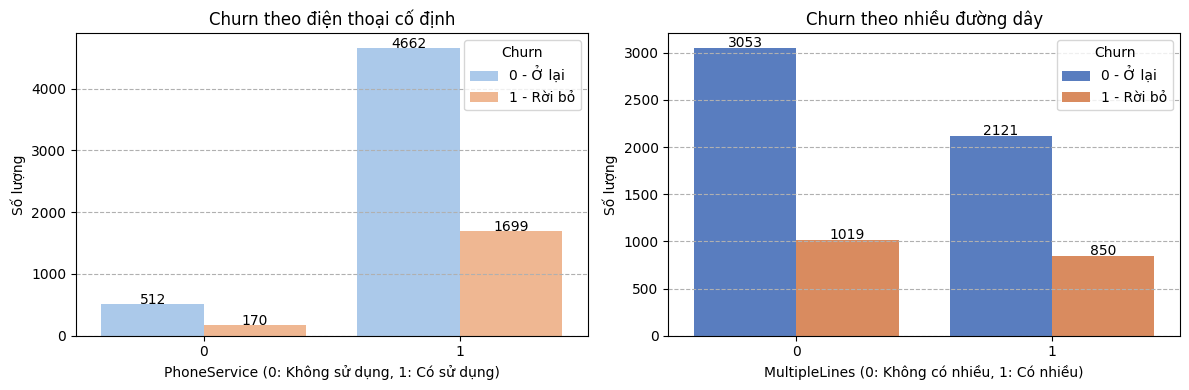

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=data, x='PhoneService', hue='Churn', ax=axes[0], palette='pastel')
axes[0].set_title('Churn theo điện thoại cố định')
axes[0].set_xlabel('PhoneService (0: Không sử dụng, 1: Có sử dụng)')  # Thêm chú giải trục x
axes[0].set_ylabel('Số lượng')

sns.countplot(data=data, x='MultipleLines', hue='Churn', ax=axes[1], palette='muted')
axes[1].set_title('Churn theo nhiều đường dây')
axes[1].set_xlabel('MultipleLines (0: Không có nhiều, 1: Có nhiều)')  # Thêm chú giải trục x
axes[1].set_ylabel('Số lượng')

for ax in axes:
    ax.legend(title='Churn', labels=['0 - Ở lại', '1 - Rời bỏ'])
    ax.grid(ls='--', axis='y')
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height() + 3, int(p.get_height()), ha='center')

plt.tight_layout()
plt.show()

**Nhận xét:**

Có hoặc không có điện thoại không ảnh hưởng lớn.

Nhiều đường dây điện thoại có thể liên quan đến churn cao hơn một chút – cần phân tích sâu hơn.

### Nhóm Các dịch vụ Internet

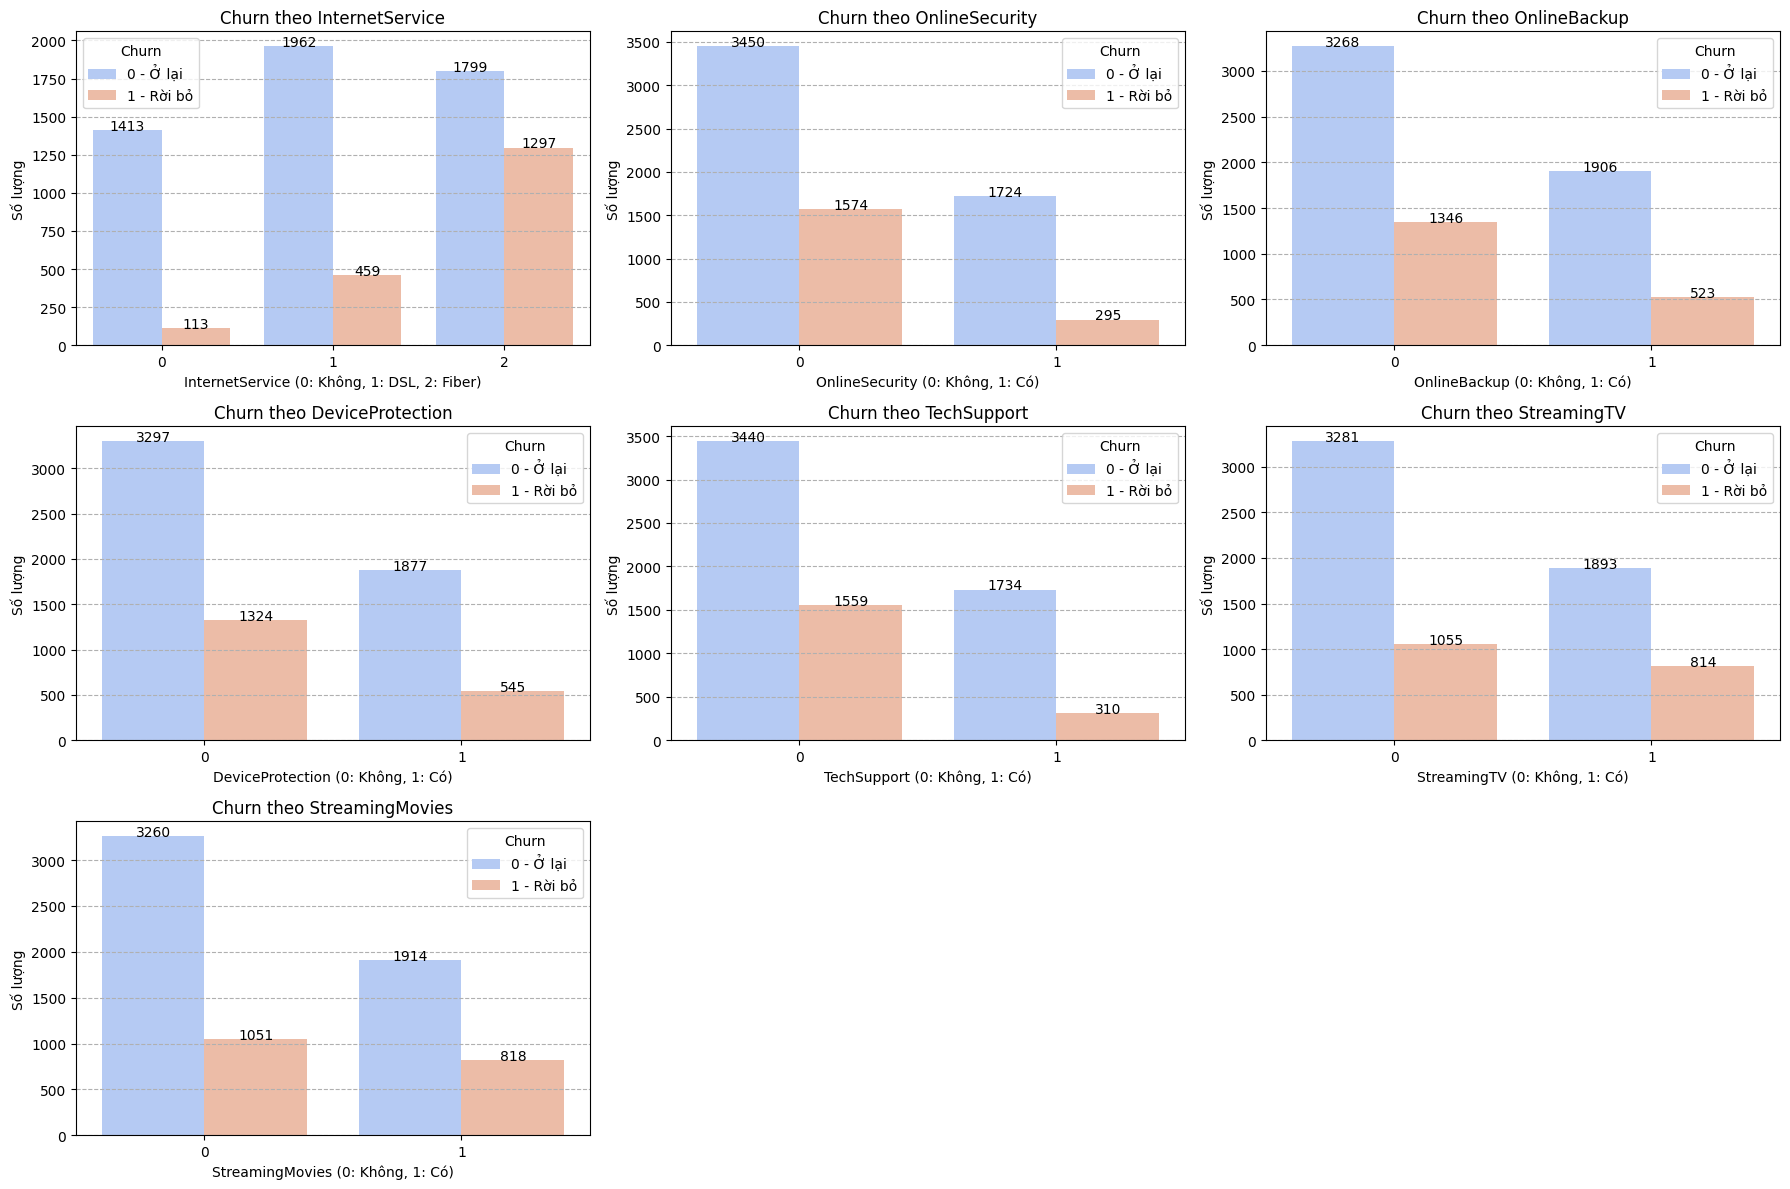

In [25]:
# Danh sách các cột dịch vụ liên quan đến Internet
service_cols = ['InternetService', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Tạo lưới biểu đồ với 3 hàng, 3 cột (tối đa 9 biểu đồ), kích thước toàn bộ figure là 18x12 inch
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

# Làm phẳng mảng axes để dễ index từng biểu đồ
axes = axes.flatten()

# Vẽ biểu đồ đếm cho từng dịch vụ trong danh sách service_cols
for i, col in enumerate(service_cols):
    ax = axes[i]  # Lấy ô (subplot) tương ứng
    sns.countplot(data=data, x=col, hue='Churn', ax=ax, palette='coolwarm')  # Vẽ biểu đồ đếm theo dịch vụ và trạng thái rời bỏ
    
    # Đặt tiêu đề cho mỗi biểu đồ
    ax.set_title(f'Churn theo {col}')
    
    # Đặt nhãn cho trục X, có điều kiện riêng cho InternetService vì nó có nhiều mức hơn
    ax.set_xlabel(f'{col} (0: Không, 1: Có)' if col != 'InternetService' else 'InternetService (0: Không, 1: DSL, 2: Fiber)')
    
    # Nhãn trục Y là số lượng khách hàng
    ax.set_ylabel('Số lượng')
    
    # Chú thích thể hiện ý nghĩa giá trị Churn
    ax.legend(title='Churn', labels=['0 - Ở lại', '1 - Rời bỏ'])
    
    # Thêm lưới ngang để dễ quan sát
    ax.grid(ls='--', axis='y')
    
    # Ghi số lượng trên đầu mỗi cột
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height() + 2, int(p.get_height()), ha='center')

# Xóa các ô trống còn lại (do chỉ có 7 biểu đồ trong khi tạo 9 ô)
for j in range(len(service_cols), 9):
    fig.delaxes(axes[j])

# Căn chỉnh bố cục biểu đồ cho gọn gàng
plt.tight_layout()

# Hiển thị toàn bộ biểu đồ
plt.show()


 **Nhận xét :**

- InternetService:

Khách hàng sử dụng Fiber optic có tỷ lệ rời bỏ cao nhất.

Khách không dùng Internet có churn thấp – có thể là nhóm khách hàng thụ động hoặc ít dùng dịch vụ.

- OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport:

Khách hàng không dùng các dịch vụ bảo vệ (bảo mật, sao lưu, hỗ trợ kỹ thuật) có tỷ lệ rời bỏ cao hơn đáng kể.

**Gợi ý:** Việc cung cấp và khuyến khích khách hàng sử dụng các dịch vụ bảo vệ có thể giúp giảm churn.

- StreamingTV và StreamingMovies:

Người dùng xem TV và phim trực tuyến có churn cao hơn, có thể vì họ yêu cầu dịch vụ chất lượng cao và dễ rời bỏ khi không hài lòng.

### Nhóm 3: Hợp đồng & Thanh toán

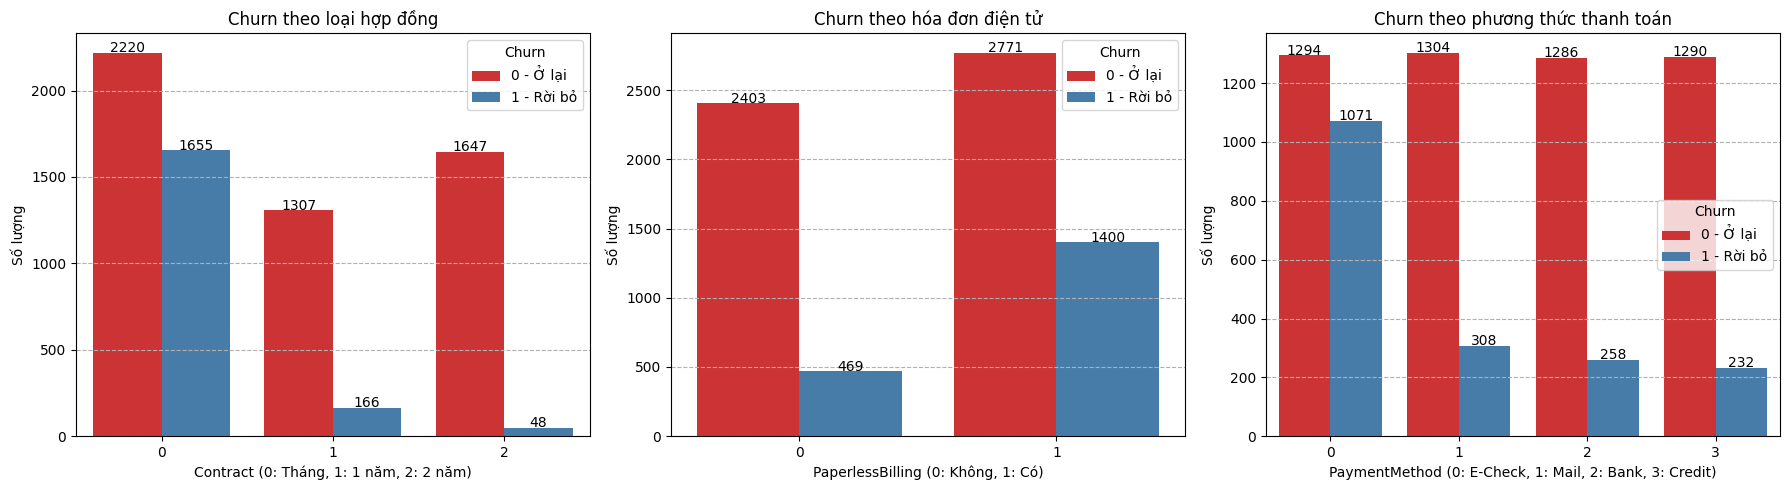

In [26]:
contract_cols = ['Contract', 'PaperlessBilling', 'PaymentMethod']
titles = ['Churn theo loại hợp đồng', 'Churn theo hóa đơn điện tử', 'Churn theo phương thức thanh toán']
xlabels = ['Contract (0: Tháng, 1: 1 năm, 2: 2 năm)', 'PaperlessBilling (0: Không, 1: Có)', 
           'PaymentMethod (0: E-Check, 1: Mail, 2: Bank, 3: Credit)']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(contract_cols):
    ax = axes[i]
    sns.countplot(data=data, x=col, hue='Churn', ax=ax, palette='Set1')
    ax.set_title(titles[i])
    ax.set_xlabel(xlabels[i])
    ax.set_ylabel('Số lượng')
    ax.legend(title='Churn', labels=['0 - Ở lại', '1 - Rời bỏ'])
    ax.grid(ls='--', axis='y')
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height() + 3, int(p.get_height()), ha='center')

plt.tight_layout()
plt.show()


 **Nhận xét:**
Contract: Khách hàng sử dụng hợp đồng theo tháng có churn cực kỳ cao, trong khi hợp đồng dài hạn giữ chân tốt hơn rõ rệt.

PaperlessBilling: Hóa đơn điện tử (không giấy) liên quan đến churn cao hơn – có thể do dễ hủy hơn.

PaymentMethod: E-check là phương thức có churn cao nhất, trong khi thanh toán qua thẻ (credit card) và chuyển khoản ngân hàng ổn định hơn.



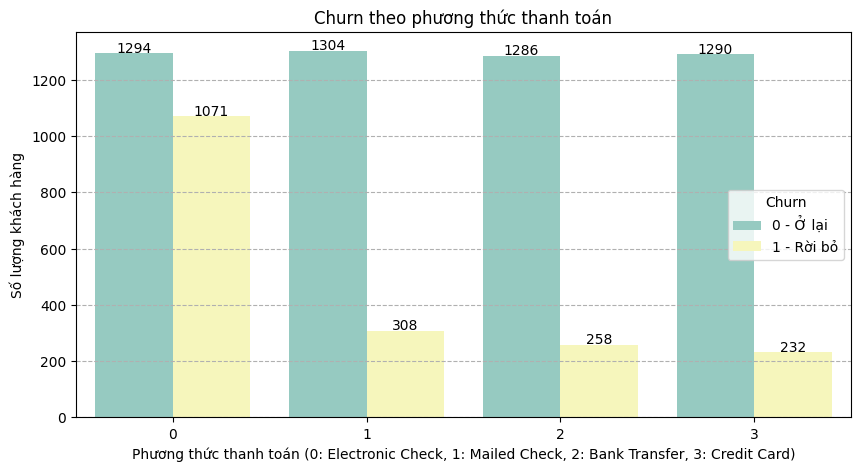

In [27]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=data, x='PaymentMethod', hue='Churn', palette='Set3')
plt.title('Churn theo phương thức thanh toán')
plt.xlabel('Phương thức thanh toán (0: Electronic Check, 1: Mailed Check, 2: Bank Transfer, 3: Credit Card)')
plt.ylabel('Số lượng khách hàng')
plt.legend(title='Churn', labels=['0 - Ở lại', '1 - Rời bỏ'])
plt.grid(ls='--', axis='y')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3,
            int(height), ha="center")

plt.show()


**Nhận xét:**
Khách hàng sử dụng phương thức thanh toán bằng điện tử (Electronic check) có tỷ lệ rời bỏ cao hơn.

Gợi ý: Có thể do mức độ tiện lợi, không ràng buộc → dễ rời bỏ.

### Nhóm 4: Chi phí & thời gian sử dụng

##### Biểu đồ phân phối (Histogram) cho TotalCharges và tenure

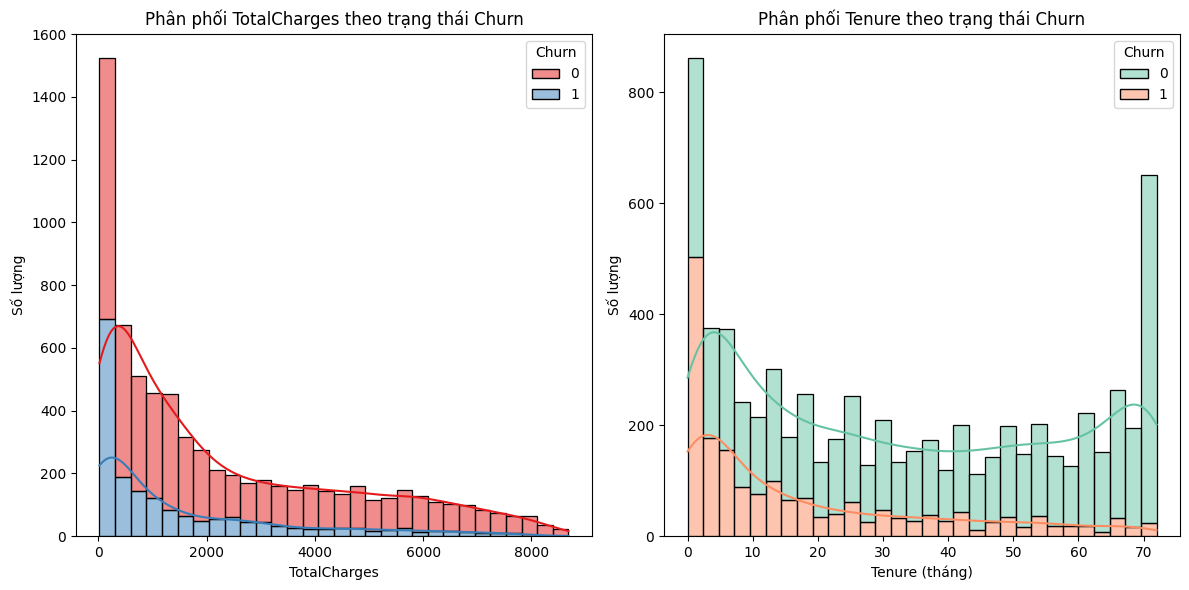

In [28]:
plt.figure(figsize=(12, 6))

# Histogram TotalCharges theo Churn
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='TotalCharges', hue='Churn', bins=30, kde=True, multiple='stack', palette='Set1')
plt.title('Phân phối TotalCharges theo trạng thái Churn')
plt.xlabel('TotalCharges')
plt.ylabel('Số lượng')

# Histogram tenure theo Churn
plt.subplot(1, 2, 2)
sns.histplot(data=data, x='tenure', hue='Churn', bins=30, kde=True, multiple='stack', palette='Set2')
plt.title('Phân phối Tenure theo trạng thái Churn')
plt.xlabel('Tenure (tháng)')
plt.ylabel('Số lượng')

plt.tight_layout()
plt.show()

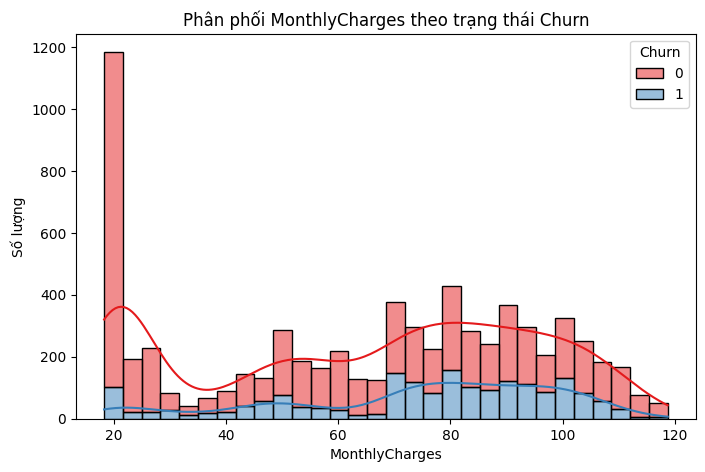

In [29]:
# Trực quan hóa phân phối MonthlyCharges theo trạng thái Churn
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', bins=30, kde=True, multiple='stack', palette='Set1')
plt.title('Phân phối MonthlyCharges theo trạng thái Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Số lượng')
plt.show()

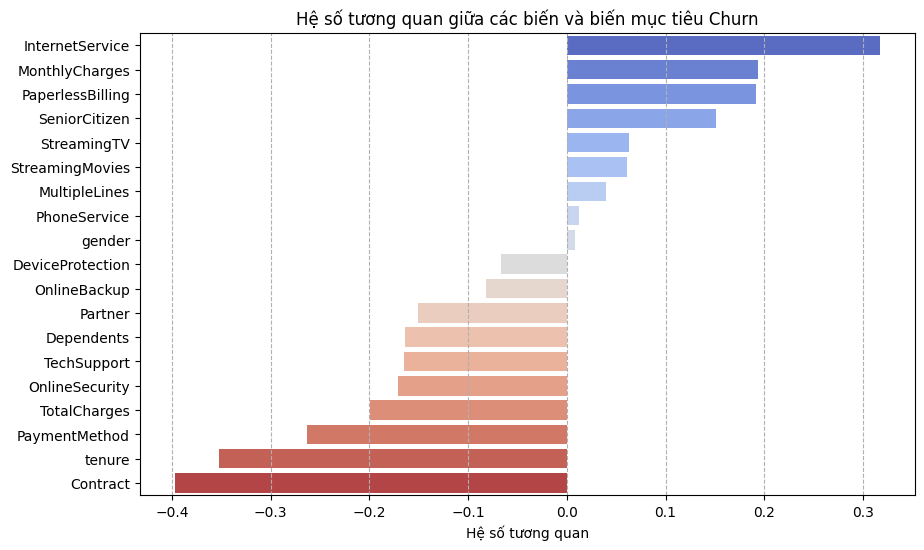

In [30]:
# Tính hệ số tương quan giữa các biến và 'Churn'
corr = data.corr(numeric_only=True)['Churn'].sort_values(ascending=False)

# Loại bỏ chính biến Churn
corr = corr.drop('Churn')

# Vẽ biểu đồ cột
plt.figure(figsize=(10,6))
sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')
plt.title('Hệ số tương quan giữa các biến và biến mục tiêu Churn')
plt.xlabel('Hệ số tương quan')
plt.grid(axis='x', ls='--')
plt.show()


In [31]:
# Tính ma trận tương quan (correlation matrix) giữa các biến số (numeric)
# Tham số numeric_only=True đảm bảo chỉ dùng các cột dạng số để tính tương quan
corr_with_churn = data.corr(numeric_only=True)['Churn'].sort_values(ascending=False)

# In ra các hệ số tương quan giữa các biến số và biến 'Churn', sắp xếp giảm dần
print(corr_with_churn)


Churn               1.000000
InternetService     0.316846
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
StreamingTV         0.063228
StreamingMovies     0.061382
MultipleLines       0.040102
PhoneService        0.011942
gender              0.008612
DeviceProtection   -0.066160
OnlineBackup       -0.082255
Partner            -0.150448
Dependents         -0.164221
TechSupport        -0.164674
OnlineSecurity     -0.171226
TotalCharges       -0.199428
PaymentMethod      -0.262818
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64


In [32]:
# # ...existing code...
# # Lưu dữ liệu đã tiền xử lý ra file CSV mới
# data.to_csv('Data/Customer_Churn_preprocessed.csv', index=False)
# print("Đã lưu dữ liệu đã tiền xử lý vào file Data/Customer_Churn_preprocessed.csv")
# # ...existing code...

### Cân bằng dữ liệu -  Áp dụng SMOTE


In [33]:

# Kiểm tra lại thông tin DataFrame
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [34]:
from imblearn.over_sampling import SMOTE

# Xác định X và y
X = data.drop('Churn', axis=1)  # Xóa cột 'Churn' để lấy đặc trưng
y = data['Churn']  # Cột 'Churn' làm nhãn

# Khởi tạo SMOTE
smote = SMOTE(random_state=42)

# Áp dụng SMOTE để tạo dữ liệu cân bằng
X_resampled, y_resampled = smote.fit_resample(X, y)

# Kiểm tra số lượng mẫu dữ liệu sau khi cân bằng
print(f"Số lượng dữ liệu sau khi SMOTE: \n{y_resampled.value_counts()}")


Số lượng dữ liệu sau khi SMOTE: 
Churn
0    5174
1    5174
Name: count, dtype: int64


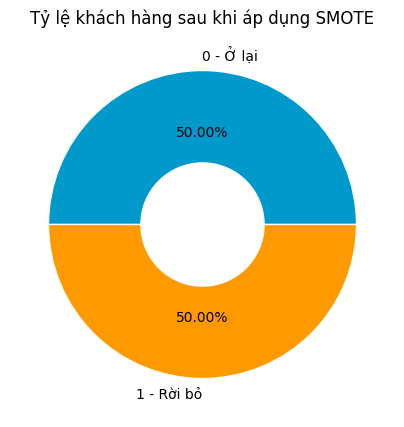

In [35]:
import matplotlib.pyplot as plt

# Trực quan hóa số lượng sau khi cân bằng bằng biểu đồ tròn
plt.figure(figsize=(12,5))
plt.pie(y_resampled.value_counts(), labels=['0 - Ở lại', '1 - Rời bỏ'], 
        autopct='%.2f%%', colors=['#0099CC', '#FF9900'], wedgeprops=dict(width=0.6, edgecolor='w'))
plt.title('Tỷ lệ khách hàng sau khi áp dụng SMOTE')
plt.show()


In [36]:

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
# X_resampled[cols_to_scale] = scaler.fit_transform(X_resampled[cols_to_scale])


### 2.5) Tách tập dữ liệu Train - Test

In [37]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [38]:
print('1.Kích thước tập Training:', X_train.shape)
print('2.Kích thước tập Test:', X_test.shape)

1.Kích thước tập Training: (7243, 19)
2.Kích thước tập Test: (3105, 19)


## Bước 3: Lựa chọn mô hình học máy 

#### 1.KNN

In [39]:
#Khai báo sử dụng thuật toán KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Khai báo model KNN, với các tham số mặc định
knn = KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier()

In [40]:
#Hiện thị các tham số
print(knn.get_params())


{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


Giải thích một số tham số quan trọng:

n_neighbors=5: số lượng "láng giềng" gần nhất để biểu quyết đầu ra (mặc định là 5).

weights='uniform': mọi láng giềng có trọng số như nhau. Có thể chuyển sang 'distance' để tính theo khoảng cách.

algorithm='auto': tự chọn thuật toán tối ưu giữa ball_tree, kd_tree, brute tùy vào dữ liệu.

leaf_size=30: kích thước lá khi dùng BallTree hoặc KDTree.

metric='minkowski': dùng khoảng cách Minkowski để tính khoảng cách giữa các điểm.

p=2: tương ứng với khoảng cách Euclidean (nếu p=1 thì là Manhattan).

n_jobs=None: số luồng xử lý song song (nếu =-1 sẽ sử dụng toàn bộ CPU cores).

#### 2. mô hình Random Fores

In [41]:
from sklearn.ensemble import RandomForestClassifier
# Khởi tạo 
rf_model = RandomForestClassifier(random_state=42)
rf_model


RandomForestClassifier(random_state=42)

In [42]:
#Hiện thị các tham số
print(rf_model.get_params())


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


#### 3. Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

# Khởi tạo model Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
logreg

LogisticRegression(max_iter=1000, random_state=42)

In [44]:
#Hiện thị các tham số
print(logreg.get_params())


{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


#### 4. XGBoost Classifier

In [45]:
from xgboost import XGBClassifier

# Khởi tạo model XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
print(xgb_model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)


### Bước 4: Huấn luyện mô hình (Training)

### KNN

In [46]:
# Trong bước 3: chúng đã chuẩn bị được dữ liệu cho tập Train + Test
#Sử dụng tập Train cho huấn luyện: Feature = X_train | Outcome = y_train
#Phương thức fit() sử dụng để huấn luyện model
knn.fit(X_train,y_train)
print(knn)

KNeighborsClassifier()


In [47]:
#Độ chính xác của Model trên tập Huấn luyện
acc_train = knn.score(X_train,y_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

Độ chính xác trên tập huấn luyện: 84.14


#### 2. mô hình Random Fores

In [48]:
rf_model.fit(X_train, y_train)
print(rf_model)

RandomForestClassifier(random_state=42)


In [49]:
#Độ chính xác của Model trên tập Huấn luyện
acc_rf_train = rf_model.score(X_train,y_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_rf_train*100,2))

Độ chính xác trên tập huấn luyện: 99.89


#### 3. Logistic Regression

In [50]:
acc_logreg_train = logreg.score(X_train, y_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_logreg_train*100, 2))

Độ chính xác trên tập huấn luyện: 83.07


#### 4. XGBoost Classifier

In [51]:
acc_xgb_train = xgb_model.score(X_train, y_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_xgb_train*100, 2))

Độ chính xác trên tập huấn luyện: 96.13


### Bước 5: Đánh giá mô hình (Evaluation)
---
* Mô hình sau khi được huấn luyện với dữ liệu huấn luyện, cần phải được kiểm tra để đánh giá độ chính xác của mô hình. 

* Trong giai đoạn này sẽ sử dụng tập dữ liệu Test (Tập dữ liệu độc lập và Model chưa biết tới các dữ liệu này) để dự đoán với model thu được.

### KNN

In [52]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test: Model.predict(X_test)
y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

[1 0 0 ... 1 1 1]


In [53]:
# Kiểm tra độ chính xác cho 20 hồ sơ đầu tiên
print('y_test:', y_test.values[:20])
print('---------------------------------------')
print('y_pred:', y_pred_knn[:20])

y_test: [1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1]
---------------------------------------
y_pred: [1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1]


In [54]:
print("Độ chính xác của mô hình KNN trên tập Test:", 
      round(accuracy_score(y_test, y_pred_knn)*100,2))
print('số hồ sơ dự đoán đúng trên tập test: ',
      accuracy_score(y_test, y_pred_knn, normalize=False), f'/{len(y_test)}')


Độ chính xác của mô hình KNN trên tập Test: 76.14
số hồ sơ dự đoán đúng trên tập test:  2364.0 /3105


#### 2. mô hình Random Fores

In [55]:
from sklearn.metrics import accuracy_score

y_pred_rf = rf_model.predict(X_test)
print("Độ chính xác trên tập test:", round(accuracy_score(y_test, y_pred_rf)*100, 2))

Độ chính xác trên tập test: 84.06


In [56]:
print('số hồ sơ dự đoán đúng trên tập test: ',
      accuracy_score(y_test, y_pred_rf, normalize=False), f'/{len(y_test)}')

số hồ sơ dự đoán đúng trên tập test:  2610.0 /3105


#### 3. Logistic Regression

In [57]:
y_pred_logreg = logreg.predict(X_test)
from sklearn.metrics import accuracy_score

print("Độ chính xác trên tập test:", round(accuracy_score(y_test, y_pred_logreg)*100, 2))


Độ chính xác trên tập test: 83.77


In [58]:
print('số hồ sơ dự đoán đúng trên tập test: ',
      accuracy_score(y_test,y_pred_logreg,
      normalize=False),f'/{len(y_test)}')

số hồ sơ dự đoán đúng trên tập test:  2601.0 /3105


#### 4. XGBoost Classifier

In [59]:
y_pred_xgb = xgb_model.predict(X_test)
from sklearn.metrics import accuracy_score

print("Độ chính xác trên tập test:", round(accuracy_score(y_test, y_pred_xgb)*100, 2))


Độ chính xác trên tập test: 84.96


In [60]:
print('số hồ sơ dự đoán đúng trên tập test: ',
      accuracy_score(y_test,y_pred_xgb,
      normalize=False), f'/{len(y_test)}')

số hồ sơ dự đoán đúng trên tập test:  2638.0 /3105


## Bước 6: Nâng cao độ chính xác của mô hình 

In [61]:
# Huấn luyện mô hình KNN với các tham số đã được tối ưu:
# - n_neighbors=7: Sử dụng 7 lân cận gần nhất
# - p=1: Sử dụng khoảng cách Manhattan
# - weights='uniform': Tất cả các lân cận được gán trọng số như nhau, distance
best_knn = KNeighborsClassifier(n_neighbors=7, p=1, weights='uniform')

# Huấn luyện mô hình trên tập dữ liệu huấn luyện
best_knn.fit(X_train, y_train)

# Đánh giá hiệu suất trên tập huấn luyện
acc_train = best_knn.score(X_train, y_train)
print("Độ chính xác KNN trên tập huấn luyện:", round(acc_train * 100, 2), "%")

# Đánh giá hiệu suất trên tập kiểm tra
acc_test = best_knn.score(X_test, y_test)
print("Độ chính xác KNN trên tập kiểm tra:", round(acc_test * 100, 2), "%")

# Dự đoán trên tập kiểm tra và hiển thị số mẫu dự đoán đúng
y_pred_knn_train = best_knn.predict(X_train)
y_pred_knn_test = best_knn.predict(X_test)
num_correct_knn_train = accuracy_score(y_train, y_pred_knn_train, normalize=False)
num_correct_knn_test = accuracy_score(y_test, y_pred_knn_test, normalize=False)
print(f"Số mẫu dự đoán đúng KNN trên tập huấn luyện: {num_correct_knn_train}/{len(y_train)}")
print(f"Số mẫu dự đoán đúng KNN trên tập kiểm tra: {num_correct_knn_test}/{len(y_test)}")


Độ chính xác KNN trên tập huấn luyện: 82.7 %
Độ chính xác KNN trên tập kiểm tra: 77.52 %
Số mẫu dự đoán đúng KNN trên tập huấn luyện: 5990.0/7243
Số mẫu dự đoán đúng KNN trên tập kiểm tra: 2407.0/3105


In [62]:
from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình Logistic Regression với các tham số tối ưu:
# - C=10: Giảm mức độ regularization (giá trị càng lớn thì regularization càng yếu)
# - solver='lbfgs': Trình tối ưu hóa phù hợp cho các bộ dữ liệu vừa và lớn
# - max_iter=1000: Số lần lặp tối đa để đảm bảo hội tụ
# - random_state=42: Đảm bảo kết quả có thể tái lập
best_logreg = LogisticRegression(C=10, solver='lbfgs', max_iter=1000, random_state=42)

# Huấn luyện mô hình trên tập dữ liệu huấn luyện
best_logreg.fit(X_train, y_train)

# Đánh giá hiệu suất mô hình trên tập huấn luyện
acc_train = best_logreg.score(X_train, y_train)
print("Độ chính xác Logistic Regression trên tập huấn luyện:", round(acc_train * 100, 2), "%")

# Đánh giá hiệu suất mô hình trên tập kiểm tra
acc_test = best_logreg.score(X_test, y_test)
print("Độ chính xác Logistic Regression trên tập kiểm tra:", round(acc_test * 100, 2), "%")
# Dự đoán trên tập kiểm tra và hiển thị số mẫu dự đoán đúng
y_pred_logreg_train = best_logreg.predict(X_train)
y_pred_logreg_test = best_logreg.predict(X_test)
num_correct_logreg_train = accuracy_score(y_train, y_pred_logreg_train, normalize=False)
num_correct_logreg_test = accuracy_score(y_test, y_pred_logreg_test, normalize=False)
print(f"Số mẫu dự đoán đúng Logistic Regression trên tập huấn luyện: {num_correct_logreg_train}/{len(y_train)}")
print(f"Số mẫu dự đoán đúng Logistic Regression trên tập kiểm tra: {num_correct_logreg_test}/{len(y_test)}")


Độ chính xác Logistic Regression trên tập huấn luyện: 82.88 %
Độ chính xác Logistic Regression trên tập kiểm tra: 84.38 %
Số mẫu dự đoán đúng Logistic Regression trên tập huấn luyện: 6003.0/7243
Số mẫu dự đoán đúng Logistic Regression trên tập kiểm tra: 2620.0/3105


In [63]:
from xgboost import XGBClassifier

# Khởi tạo mô hình XGBoost với các tham số đã tối ưu:
# - use_label_encoder=False: Tắt cảnh báo về encoder do XGBoost từ phiên bản mới không yêu cầu encode label
# - eval_metric='logloss': Sử dụng log loss làm chỉ số đánh giá trong quá trình huấn luyện
# - learning_rate=0.1: Tốc độ học, giá trị nhỏ giúp mô hình học chậm nhưng ổn định hơn
# - max_depth=5: Độ sâu tối đa của mỗi cây, kiểm soát độ phức tạp mô hình
# - n_estimators=200: Số lượng cây trong mô hình boosting
# - random_state=42: Đảm bảo tính tái lập kết quả
best_xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    learning_rate=0.1,
    max_depth=5,
    n_estimators=200,
    random_state=42
)

# Huấn luyện mô hình trên tập huấn luyện
best_xgb.fit(X_train, y_train)

# Đánh giá hiệu suất trên tập huấn luyện
acc_train = best_xgb.score(X_train, y_train)
print("Độ chính xác XGBoost trên tập huấn luyện:", round(acc_train * 100, 2), "%")

# Đánh giá hiệu suất trên tập kiểm tra
acc_test = best_xgb.score(X_test, y_test)
print("Độ chính xác XGBoost trên tập kiểm tra:", round(acc_test * 100, 2), "%")

y_pred_xgb_train = best_xgb.predict(X_train)
y_pred_xgb_test = best_xgb.predict(X_test)
num_correct_xgb_train = accuracy_score(y_train, y_pred_xgb_train, normalize=False)
num_correct_xgb_test = accuracy_score(y_test, y_pred_xgb_test, normalize=False)
print(f"Số mẫu dự đoán đúng XGBoost trên tập huấn luyện: {num_correct_xgb_train}/{len(y_train)}")
print(f"Số mẫu dự đoán đúng XGBoost trên tập kiểm tra: {num_correct_xgb_test}/{len(y_test)}")


Độ chính xác XGBoost trên tập huấn luyện: 91.27 %
Độ chính xác XGBoost trên tập kiểm tra: 84.86 %
Số mẫu dự đoán đúng XGBoost trên tập huấn luyện: 6611.0/7243
Số mẫu dự đoán đúng XGBoost trên tập kiểm tra: 2635.0/3105


In [64]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo mô hình Random Forest với các tham số đã tối ưu:
# - n_estimators=200: Sử dụng 200 cây quyết định (decision trees)
# - max_depth=20: Giới hạn độ sâu tối đa của mỗi cây nhằm tránh overfitting
# - min_samples_split=5: Một node sẽ được chia nếu có ít nhất 5 mẫu – giúp kiểm soát phân nhánh
# - min_samples_leaf=2: Mỗi lá phải chứa ít nhất 2 mẫu – giúp cây tổng quát hóa tốt hơn
# - max_features='sqrt': Chọn sqrt(số lượng đặc trưng) cho mỗi lần chia – kỹ thuật phổ biến trong Random Forest
# - random_state=42: Đảm bảo tính tái lập của kết quả
best_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

# Huấn luyện mô hình Random Forest trên tập huấn luyện
best_rf.fit(X_train, y_train)

# Đánh giá hiệu suất mô hình trên tập huấn luyện
acc_train = best_rf.score(X_train, y_train)
print("Độ chính xác Random Forest trên tập huấn luyện:", round(acc_train * 100, 2), "%")

# Đánh giá hiệu suất mô hình trên tập kiểm tra
acc_test = best_rf.score(X_test, y_test)
print("Độ chính xác Random Forest trên tập kiểm tra:", round(acc_test * 100, 2), "%")

# Dự đoán trên tập kiểm tra và hiển thị số mẫu dự đoán đúng
y_pred_rf_train = best_rf.predict(X_train)
y_pred_rf_test = best_rf.predict(X_test)
num_correct_rf_train = accuracy_score(y_train, y_pred_rf_train, normalize=False)
num_correct_rf_test = accuracy_score(y_test, y_pred_rf_test, normalize=False)
print(f"Số mẫu dự đoán đúng Random Forest trên tập huấn luyện: {num_correct_rf_train}/{len(y_train)}")
print(f"Số mẫu dự đoán đúng Random Forest trên tập kiểm tra: {num_correct_rf_test}/{len(y_test)}")



Độ chính xác Random Forest trên tập huấn luyện: 95.04 %
Độ chính xác Random Forest trên tập kiểm tra: 83.9 %
Số mẫu dự đoán đúng Random Forest trên tập huấn luyện: 6884.0/7243
Số mẫu dự đoán đúng Random Forest trên tập kiểm tra: 2605.0/3105


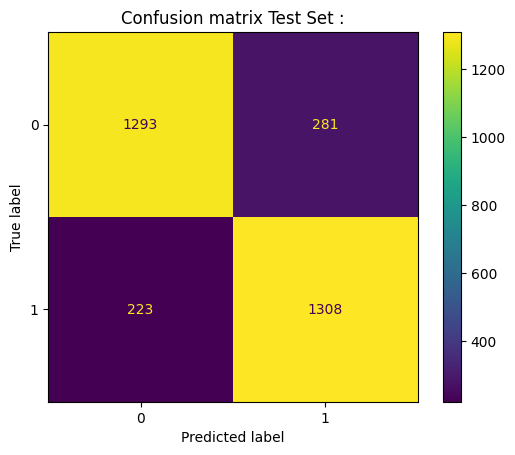

In [65]:
#3.Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Tính ma trận confusion matrix:
cnf_matrix_titanic = confusion_matrix(y_test,y_pred_logreg)

#Hiển thị ma trận:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logreg)
plt.title('Confusion matrix Test Set :')
plt.show()

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Dự đoán trên tập test với các mô hình
y_pred_knn = best_knn.predict(X_test)
y_pred_logreg = best_logreg.predict(X_test)
# y_pred_rf = best_rf.predict(X_test)
# y_pred_xgb = best_xgb.predict(X_test)

# Tạo hàm tính các chỉ số đánh giá
def get_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred)
    }

# Lưu kết quả từng mô hình
results = {
    "KNN": get_metrics(y_test, y_pred_knn),
    "Logistic Regression": get_metrics(y_test, y_pred_logreg),
#     "Random Forest": get_metrics(y_test, y_pred_rf),
#     "XGBoost": get_metrics(y_test, y_pred_xgb)
}

# Chuyển thành bảng DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)  # làm tròn 4 chữ số thập phân
print(results_df)


                     Accuracy  Precision  Recall  F1-score
KNN                    0.7752     0.7339  0.8537    0.7893
Logistic Regression    0.8438     0.8361  0.8498    0.8429


In [67]:
import pickle

# Lưu mô hình Logistic Regression đã huấn luyện (best_logreg)
with open('best_logreg_model.pkl', 'wb') as f:
    pickle.dump(best_logreg, f)
print("Đã lưu mô hình Logistic Regression tối ưu thành công!")

Đã lưu mô hình Logistic Regression tối ưu thành công!


### Dự đoán mô hình

In [71]:
import pandas as pd
import numpy as np

# Danh sách các cột (theo thứ tự đã mã hóa)
cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
    'MonthlyCharges', 'TotalCharges'
]

# Nhập dữ liệu từ bàn phím
values = []
print("Nhập thông tin khách hàng (theo hướng dẫn):")
for col in cols:
    val = input(f"{col}: ")
    values.append(float(val))

# Tạo DataFrame cho mẫu mới
sample = pd.DataFrame([values], columns=cols)

# # Chuẩn hóa các cột số nếu bạn đã chuẩn hóa khi train
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
# sample[cols_to_scale] = scaler.fit_transform(sample[cols_to_scale])

# Dự đoán với mô hình đã huấn luyện (ví dụ: best_logreg hoặc best_knn)
pred = best_logreg.predict(sample)
print("Kết quả dự đoán (0: Ở lại, 1: Rời bỏ):", int(pred[0]))

Nhập thông tin khách hàng (theo hướng dẫn):
gender: 2
SeniorCitizen: 1
Partner: 1
Dependents: 1
tenure: 1
PhoneService: 1
MultipleLines: 1
InternetService: 1
OnlineSecurity: 1
OnlineBackup: 1
DeviceProtection: 1
TechSupport: 1
StreamingTV: 1
StreamingMovies: 1
Contract: 0
PaperlessBilling: 0
PaymentMethod: 0
MonthlyCharges: 0
TotalCharges: 0
Kết quả dự đoán (0: Ở lại, 1: Rời bỏ): 0


In [72]:
# So sánh 20 kết quả dự đoán đầu tiên với dữ liệu thực tế
y_pred = best_logreg.predict(X_test)
print("Giá trị thực tế (y_test):", y_test.values[:20])
print("Giá trị dự đoán (y_pred):", y_pred[:20])

Giá trị thực tế (y_test): [1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1]
Giá trị dự đoán (y_pred): [1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1]


In [73]:
import pandas as pd

# Dự đoán
y_pred = best_logreg.predict(X_test)

# Tạo bảng gồm 20 khách hàng đầu tiên từ X_test
X_test_20 = X_test.iloc[:20].copy()

# Thêm cột giá trị thực tế và dự đoán
X_test_20["Giá trị thực tế"] = y_test.iloc[:20].values
X_test_20["Giá trị dự đoán"] = y_pred[:20]

# Hiển thị
X_test_20


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Giá trị thực tế,Giá trị dự đoán
9428,0,0,0,0,47,1,1,2,0,0,...,0,1,0,0,0,0,93.853385,4506.133022,1,1
4593,1,0,0,0,11,1,0,0,0,0,...,0,0,0,0,0,2,20.300000,246.300000,0,0
5379,1,0,1,0,56,1,1,2,1,0,...,0,1,1,1,1,0,98.000000,5270.600000,0,0
8918,0,0,0,0,7,1,0,2,0,0,...,0,0,0,0,0,0,76.966250,632.799277,1,1
6448,0,0,0,0,58,1,1,2,0,0,...,1,1,1,1,1,0,104.650000,6219.600000,1,0
6060,1,1,0,0,8,1,0,2,0,1,...,0,1,0,0,1,0,87.100000,713.600000,0,1
850,1,0,1,1,72,1,1,2,1,1,...,1,1,1,2,1,2,115.800000,8476.500000,0,0
713,1,0,0,1,14,1,1,2,1,0,...,1,0,0,0,1,1,86.000000,1164.050000,0,0
8661,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,21.809532,62.186442,1,1
4438,0,0,1,1,51,1,1,0,0,0,...,0,0,0,2,1,1,24.950000,1222.250000,0,0
